<br>

**<font size="5">Table of contents</font>** 

 - [**Chapter 1: Introduction**](#Chapter1)
     - [**1.1 Goal**](#1.1)
     - [**1.2 Statistical methods**](#1.2)
     - [**1.3 Data and portfolio construction**](#1.3)
 - [**Chapter 2:  Simulation analysis Part 2**](#Chapter2)
    - [**2.1.Simulation Period: 01-01-1963 till 31-12-2003**](#2.1)
        - [**2.1.1 Mkt-RF**](#2.1.1)
        - [**2.1.2 HML**](#2.1.2)
        - [**2.1.3 WML**](#2.1.3)
        - [**2.1.4 HML-WML**](#2.1.4)
    - [**2.2.Simulation Period: 01-01-1927 till 31-12-2003**](#2.2)
        - [**2.2.1 Mkt-RF**](#2.2.1)
        - [**2.2.2 HML**](#2.2.2)
        - [**2.2.3 WML**](#2.2.3)
        - [**2.2.4 HML-WML**](#2.2.4)
    - [**2.3 Summarize Results**](#2.3)
        - [**2.3.1 Simulation Period: 01-01-1963 till 31-12-2003**](#2.3.1)
        - [**2.3.2 Simulation Period: 01-01-1927 till 31-12-2003**](#2.3.2)
 - [**Chapter 3:  Conclusion and discussion**](#Chapter3)
 - [**Chapter 4:  Limitations**](#Chapter4)
 - [**Chapter 5: References**](#Chapter5)


<a id='Chapter1'></a>
# Chapter 0: Introduction

<a id='1.1'></a>
## Goal
 
As a recap, in part 1, I constructed the portfolios and performed some exploratory data analysis. `The goal of this notebook is:` 

 - Try to answer whether recent performance of value and momentum is in line with historical performance. Several people have noticed that most factors did not deliver much return in the last 15 years. Are the value and momentum broken or just experiencing a period of bad luck? 


<a id='1.2'></a>
## Statistical methods 

To answer these question I use different simulation assumptions about the behavior of factor returns:


 - **Simulation under normality:** approximates factor returns by normal distributions
that I calibrate using the sample means and standard deviations from the full
sample.


- **The independent bootstrap:** 
resamples each factor’s return independently with replacement (i.e., allowing observations to
be chosen multiple times) from every other factor. This bootstrap scheme
preserves the empirical distributions of factor returns that is, it accounts for
deviations from normality, but does not account for serial correlations in factor returns.


- **Block bootstrap**: The independent bootstrap requires that the data being bootstrapped is independent and identically distributed (iid). This does not work well for time series, where serial correlation is present. One approach that addresses this limitation is block bootstrapping. There are several versions of the block bootstrap, I will look at the:  
<br> 
    - **Circular block bootstrap (CBB)**: is an improvement on the [**moving block bootstrap (MBB)**](https://www.youtube.com/watch?v=-M1UtvoajUY). The MBB randomly draws fixed overlapping blocks from the data and cut and pastes them to form a new series the same size as the original data. However, it has a major limitation in that beginning and ending points are systematically underrepresented. To address this limitation an extension to this method was developed called the Circular Block Bootstrap (CBB). This approach is much the same except that it wraps around the beginning and ending points to ensure they are drawn with similar probability as the other blocks. 
<br>

    - **Stationary bootstrap (SB)**: One limitation of the circular block bootstrap is the fixed block size. Different block sizes emphasize different periods or lengths of autocorrelation (memory). At the extremes you can take a block size so small that no serial correlation is captured, and at the other end you could take a block size so large that you end up sampling the original series. To address the fixed block sizes, the Stationary Bootstrap (SB) randomly samples blocks from a geometric distribution with mean $k$. The advantage of this approach is that the circular block bootstrap doesn't quite give us a stationary time series (The distribution of $R_{k-1:k}$ is not the same as the distribution of $R_{k:k+1}$). Averaging over the random choices of block lengths overcomes this problem.

Note that the  MBB, CBB, SB and all sample overlapping blocks in contrast, the **[fixed block bootstrap](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=Carlstein+%281986%29&btnG)** samples distinct blocks. I found an excellent implementation of these methods in the [**ARCH package**](https://arch.readthedocs.io/en/latest/bootstrap/timeseries-bootstraps.html). 

**Bootstrap implementation**

When bootstrapping the simulated paths for different investment horizons, I use the total length of the observed path to sample from. As a result, I obtain a  matrix where each column is a simulated path. Similar as **[Fama and French](https://academic.oup.com/raps/article-abstract/8/2/232/4810768)** I then calibrate the number of rows of this matrix depending on the investment horizon.

<a id='1.3'></a>
## Data and portfolio construction 

I will be using daily returns (possible to change to monthy) obtained from [**Kenneth French's data library**](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) for the US stock market (NYSE, AMEX, and NASDAQ) over the period  03/01/1927 to 28/02/2019. The data can be sourced directly from their website using [**Pandas datareader**](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html). Note thate the Fama-French returns are simple raw returns (not log returns). 

**As a reminder:**

 - A **value strategy** favors high fundamentals-to-price ratios by going long these stocks, while selling short those stocks
that have lower fundamentals-to-price ratios.
 - On the other hand, a **momentum strategy** exploits the phenomenon that securities which have performed well relative
to peers (winners) on average continue to outperform, and securities that have performed relatively poorly (losers) tend to
continue to under-perform.

**Long-Short Portfolio Construction:**

There are different ways to construct long-short value and momentum portfolio's. For now I will construct the portfolio's as **[Fama and French (2012)](https://www.sciencedirect.com/science/article/pii/S0304405X12000931)**:

  -  **Value Portfolio (HML):** 
 <br>
 
 - `book equity (BE)`
 - `market equity (ME)`
      
 is formed by first splitting the universe of stocks into two size categories: `Small (S)  and Big (B)` using NYSE market cap medians and then splitting stocks `into three groups based on book-to-market equity highest 30% (H), middle 40% (M), and lowest 30% (L)`, using NYSE breakpoints. The intersection of stocks across the six categories are value-weighed and used to form the portfolios SH (small, high $\frac{BE}{ME}$), SM (small, middle $\frac{BE}{ME}$), SL (small, low $\frac{BE}{ME}$), BH (big, high $\frac{BE}{ME}$), BM (big, middle $\frac{BE}{ME}$), and BL (big, low $\frac{BE}{ME}$). HML is the average of the two high book-to-market portfolios minus the average of the two low book-to-market portfolios. 

\begin{equation} \text{HML} =	\frac{1}{2}\times  (\text{Small High Value} + \text{Big High Value})
 - \frac{1}{2}\times (\text{Small Low Value} + \text{Big Low Value})\end{equation}

 - **Momentum portfolio (WML):** is constructed similarly to HML in which six value-weight portfolios formed on size and prior (2-12) returns to construct momentum. Specifically, prior (2-12) returns is defined as the past 12-month return, skipping the most recent months return to avoid micro-structure and liquidity biases and now generally used as the standard definition of momentum. The portfolios, which are formed daily, are the `intersections of 2 portfolios formed on size (market equity, ME) and 3 portfolios formed on prior (2-12) return`. The daily size breakpoint is the median NYSE market equity. The daily prior (2-12) return breakpoints are the 30th and 70th NYSE percentiles. Momentum is the average return on the two high prior return portfolios (Winners) minus the average return on the two low prior return portfolios (Losers)

\begin{equation} \text{WML} =	\frac{1}{2}\times  (\text{Small Winners} + \text{Big Winners})
 - \frac{1}{2}\times (\text{Small Losers} + \text{Big Losers})\end{equation}


 - **Value-Momentum portfolio (HML-WML)**: is a `60-40 weighting` of the value and momentum strategy (closer to a real 50-50 value and momentum).
 

 -  **Market portfolio (Mkt-RF):** represents the equity market risk premium, or aggregate equity return minus the risk free
rate. It is the return from simply being long equities at market capitalization weights and, unlike other factors, is not a
spread return between

Other common implementations of value and momentum are based on deciles and quintiles. For example, **[Moskowitz and Daniel (2016)](https://www.sciencedirect.com/science/article/pii/S0304405X16301490)** construct their momentum portfolios based on deciles where the winner portfolio is decile 1 and the loser portfolio decile 10. Formally, this can be represented as follow:

\begin{equation} \text{WML (Dec.)} =\text{Winners(D1)} - \text{Losers(D10)}\end{equation}


What follows is some of my initial experimentation with these simulation approaches along with some caveats. The analysis is organized as follow: in [**Chapter 1**](#Chapter4), I look at the recent past performance of these portfolios and examine whether this is in line with historical performance. Finally, in [**Chapter 2**](#Chapter5) and [**Chapter 3**](#Chapter6) , I summarize my conclusions and discusses limitations and some concerns about the study. 

At the top of each chapter I have declared which functions are being used. To keep the notebook as well-organized as possible, I have decided to put these functions into a separate file named `simulation_lib_log` . Furthermore, note that I use strategies, portfolios, factors interchangeably throughout the analysis. They all have the same interpretation. 

**<font size="5">Import libraries</font>**

In [1]:
# clear all variables each time you rerun the script
from IPython import get_ipython
get_ipython().magic('reset -sf')

# notebook settings
from pathlib import Path
import datetime
import os
import warnings
warnings.filterwarnings("ignore")
os.chdir("C:\\Users\Pieter-Jan\Documents\Factor_Crashes\Thesis\Images")

# scientific libraries
import pandas as pd
import numpy as np
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web
import scipy.stats

# plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

# imports file with all custum functions
from importlib import reload 
import Helper_simple_lib
# instead of listing all individual functions, we chose here to load everything
# Make sure to use unique function names, though, or you might overrule built-in functions
# reload(Helper_simple_lib)
from Helper_simple_lib import *

# plot parameters
sns_params = {
    'font.family':'serif',
    'mathtext.fontset':'cm',
    'mathtext.rm': 'serif',
    'font.size': 12,
    'font.weight': 'medium',
    'figure.figsize': (10, 7),
}
plt.style.use('seaborn-talk')
plt.style.use('ggplot')
sns.set_context(sns_params)
savefig_kwds = dict(dpi=300, bbox_inches='tight', frameon=True, format='png')
set2=['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9']
#plt.style.available
#sns.set(style='darkgrid', context='talk')
%matplotlib inline

**<font size="4">Global parameters</font>**

Global parameters are defined in CAPITAL LETTERS. This makes it is easy to quickly change from daily data to monthly and some other parameters.

In [2]:
# data frequency, easy to change between month and daily data
FREQUENCY = 252  # assuming 252 trading days in a year
N_PATHS = 10_000  # nr ob paths (bootstraps)
BLOCKSIZE = 126  # blocksize, for the stationary bootstrap this is the mean of the geometric distribution
START_YEAR = 1927  # start year when sourcing the portfolios from FAMA AND FRENCH
PLOT_INTERMEDIATE = False  # plots intermediate histograms when calling the simulation methods
np.random.seed(31415)  #random state
TARGET_VOL = 12/np.sqrt(FREQUENCY)

# Portfolio names from FAMA AND FRENCH ; to switch to monthly just remove '_daily'
VALUE = '6_Portfolios_2x3_daily'
MOMENTUM = '6_Portfolios_ME_Prior_12_2_daily'
# decimal points
pd.options.display.float_format = '{:.3f}'.format

# path to read in the data
PATH_DATA = 'C:\\Users\\Pieter-Jan\\Documents\\Factor_Crashes\\Code\\Simulation\\Portfolios\\'

In [3]:
df_factors = pd.read_csv(PATH_DATA + "portfolios.csv").set_index("Date")
df_factors.index = df_factors.index.astype('datetime64[ns]')

# convert to log space
#df_factors_log = np.log(1 + df_factors / 100) * 100

# Returns used
RETURNS = df_factors

In [4]:
# scale portfolios to have the same standard deviation
#df_factors_log = (df_factors_log.multiply(TARGET_VOL/df_factors_log.std()))
#df_factors_log.std()*np.sqrt(FREQUENCY)

**<font size="4">Performance functions</font>**

some anonymous function to calculate various (performance) statistics,
these functions are stored in a dictionary

In [5]:
"""
some anonymous function to calculate various (performance) statistics,
these functions are stored in a dictionary

params:

    - df: pandas dataframe with the raw returns
    - time_freq: an integer indicating the number of trading days
    - treshold: a float determining the level of drawdown is taken into account
      when calculating the percentage of time an investment is in a drawdown state


returns:

    - numpy array with the calculted statistic
"""


def P_Gr(time_freq=FREQUENCY, df=None):    return \
(np.exp(time_freq*np.mean(df.values/100, axis=0))-1)*100


def P_Gvol(time_freq=FREQUENCY, df=None):    return \
(np.exp(np.sqrt(time_freq)*np.std(df.values/100, axis=0))-1)*100


# put functions into a dictionary, so we can choose which one to call
PERF_STAT_DIC = {
    
    "N":
    lambda df=None:df.describe().loc["count",:].values,   
    "Min":
    lambda df=None:df.min().values,
    "25 %":
    lambda df=None:np.percentile(df,25,axis=0),
    "50 %":
    lambda df=None:np.percentile(df,50,axis=0),
    "75 %":
    lambda df=None:np.percentile(df,75,axis=0),
    "Max":
    lambda df=None:df.max().values,
    "Mean":
    lambda df=None: np.mean(df.values, axis=0),
    "SD":
    lambda df=None: df.std().values,
    "Skew":
    lambda df=None: df.skew().values,
    "Kurtosis":
    lambda df=None: df.kurtosis().values,
    "Terminal Wealth":
    lambda df=None: (1+df / 100).cumprod().iloc[-1, :],
    "Mean (yr)":
    lambda time_freq=FREQUENCY, df=None: df.mean()*time_freq,
    "SD (yr)":
    lambda time_freq=FREQUENCY, df=None: df.std()*np.sqrt(time_freq),
    "SR (yr)":
    lambda time_freq=FREQUENCY, df=None: (df.mean().values/df.std().values)*np.sqrt(time_freq),
    "SR":
    lambda time_freq=FREQUENCY, df=None: df.mean().values/df.std().values,
    "Kappa Ratio":
    lambda threshold_risk=0, threshold_return=0, order=3, time_freq=FREQUENCY,
    df=None: kappa_ratio(threshold_risk=threshold_risk,
                         threshold_return=threshold_return,
                         order=order,
                         time_freq=1,
                         df=df),
    "MDD (%)":
    lambda df=None: np.max(drawdown(df=df), axis=0) * 100,
    "Calmar Ratio (yr)":
    lambda time_freq=FREQUENCY, df=None: df.mean()*time_freq / (
        np.max(drawdown(df=df), axis=0) * 100),
    "Max TUW (Year)":
    lambda time_freq=FREQUENCY, df=None: np.max(np.apply_along_axis(
        max_time_dd, 0, drawdown(df=df)),
                                                axis=0) / time_freq,
    "Underwater (%)":
    lambda df=None: np.sum(drawdown(df=df) != 0, axis=0) / len(df) * 100,
    f"% MDD >{20} %":
    lambda treshold=0.20, df=None: np.sum(drawdown(df=df) > treshold, axis=0
                                          ) / len(df) * 100
}

In [6]:
stats = ["Min","Max","Mean","SD","Skew","Kurtosis","Mean (yr)","SD (yr)","SR (yr)","MDD (%)","% MDD >20 %"]
out = perf_stat(df=RETURNS.iloc[:, :4],
              dic_perf=PERF_STAT_DIC,
              all_stats=True)
out
#print(out.loc[stats,:].to_latex())

,Mkt-RF,HML,WML,HML-WML
N,24323.000,24323.000,24323.000,24323.000
Min,-17.440,-5.985,-18.335,-5.401
25 %,-0.400,-0.240,-0.240,-0.155
50 %,0.060,0.005,0.060,0.028
75 %,0.490,0.255,0.345,0.202
Max,15.760,8.425,7.010,6.009
Mean,0.029,0.016,0.026,0.020
SD,1.065,0.585,0.744,0.423
Skew,-0.118,0.740,-1.606,-0.123
Kurtosis,16.594,15.820,27.203,15.278


In [7]:
import scipy.stats as stats

sp_c = pd.DataFrame(stats.spearmanr(RETURNS.iloc[:,:4])[0],
             columns=RETURNS.columns[0:4],index=RETURNS.columns[0:4])
sp_c

,Mkt-RF,HML,WML,HML-WML
Mkt-RF,1.000,0.011,0.030,0.005
HML,0.011,1.000,-0.055,0.713
WML,0.030,-0.055,1.000,0.561
HML-WML,0.005,0.713,0.561,1.000


<a id='Chapter2'></a>
# Chapter 2 Simulation Analysis Part 2

## Recent poor performance of the Momentum and Value factor 

The figure below shows that value and momentum factor did not deliver much return
in the **last 15 years (01-01-2004 to 28-02-2019)**. Are these factors broken or just experiencing a period of bad luck? To answer this question, I examine the role of bad luck in explaining the recent poor performance of factors. I start with measuring the performance of each factor over the last 15 years
ending February 2019 and use simulations to assess the likelihood of observing this level of
performance, given how the factors performed before these recent years. I compare factor performance from **January 2004** through **February 2019** to performance from:
 - **July 1963 through December 2003**. 
 - **January 1927 through December 2003**
 
Similar as in Chapter 3, I then simulate returns under different assumptions to assess which features of factor returns, if any, can account for their poor recent performance. Some Papers **only include data starting from 1963** because they argue that the period before is not representative anymore due to higher volatility. Therefore, I will analyze both periods separately and look whether there are notable differences. **The number of simulations is set at 10,000. and the blocksize and mean blocksize are both 126 days**. Finally, the bootstrap samples where I calculate the statistic of interest on are based on an investment horizon of 15 years.

**<font size="4">Helper functions (defined in a seperate file `simulation_log_lib`)</font>**

 - `Return_DD:` plots the cumulative return and drawdown among each other
 - `perf_stat:` appends the performance statistics in a pandas data frame
 - `Simulation`: class with the bootstrapping (simulation) methods
     -  normal
     - iid bootstrap
     - moving block bootstrap
     - circular block bootstrap
     - stationary bootstrap
 - `permutation_plot`: density plot of the permuted statistic(s)
 - `p_table:`appends the p-values for different statistics , investment horizons, 
    strategies and simulation methods in a table

### Performance over the last recent 15 years

In [8]:
dic_fac = {
    "Mkt-RF": "Market minus risk free rate (Mkt-RF)",
    "HML": "Value (HML)",
    "WML": "Momentum (WML)",
    "HML-WML": "Value Momentum (HML-WML)",
    "RF": "Risk Free rate"
}

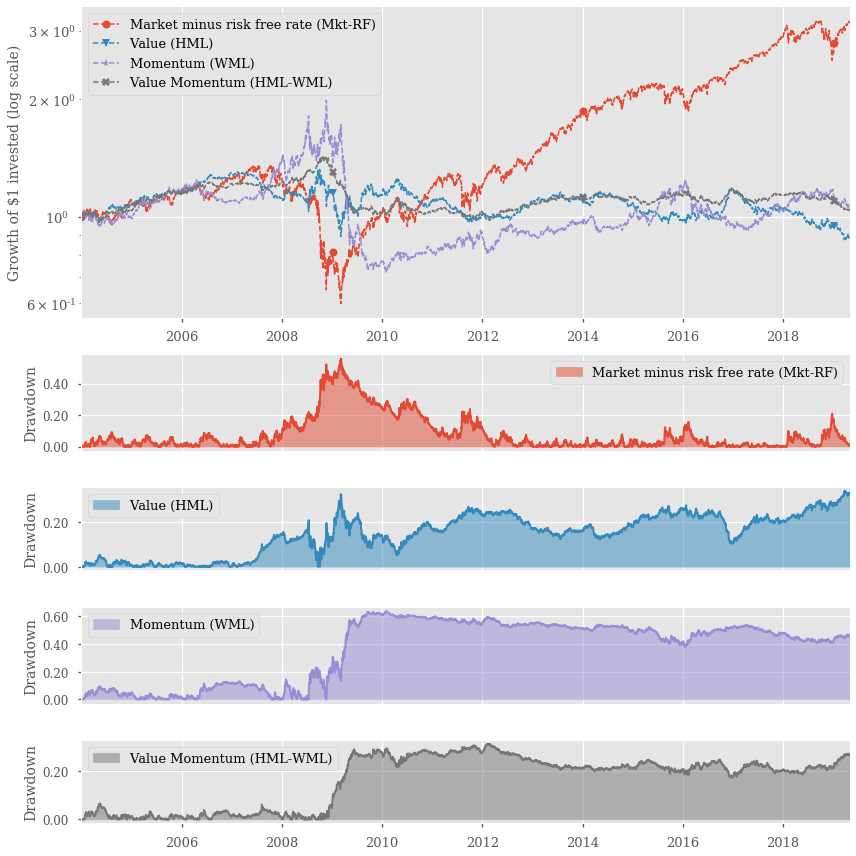

In [9]:
start = datetime.date(year=2004, month=1, day=1)
df_15 = RETURNS.loc[start:]
Return_DD(df=df_15, dic_labels=dic_fac, time_frequency=FREQUENCY)

In [10]:
perf_stat(df=df_15.iloc[:, :4], all_stats=True, dic_perf=PERF_STAT_DIC)

,Mkt-RF,HML,WML,HML-WML
N,3857.000,3857.000,3857.000,3857.000
Min,-8.950,-4.220,-8.200,-1.942
25 %,-0.410,-0.285,-0.360,-0.187
50 %,0.070,-0.015,0.055,0.018
75 %,0.540,0.255,0.430,0.197
Max,11.350,4.835,7.010,1.931
Mean,0.037,-0.001,0.006,0.002
SD,1.155,0.625,0.919,0.360
Skew,-0.179,0.632,-0.806,-0.307
Kurtosis,10.705,10.772,11.194,3.152


### Performance  before the last 15 years starting from 1963

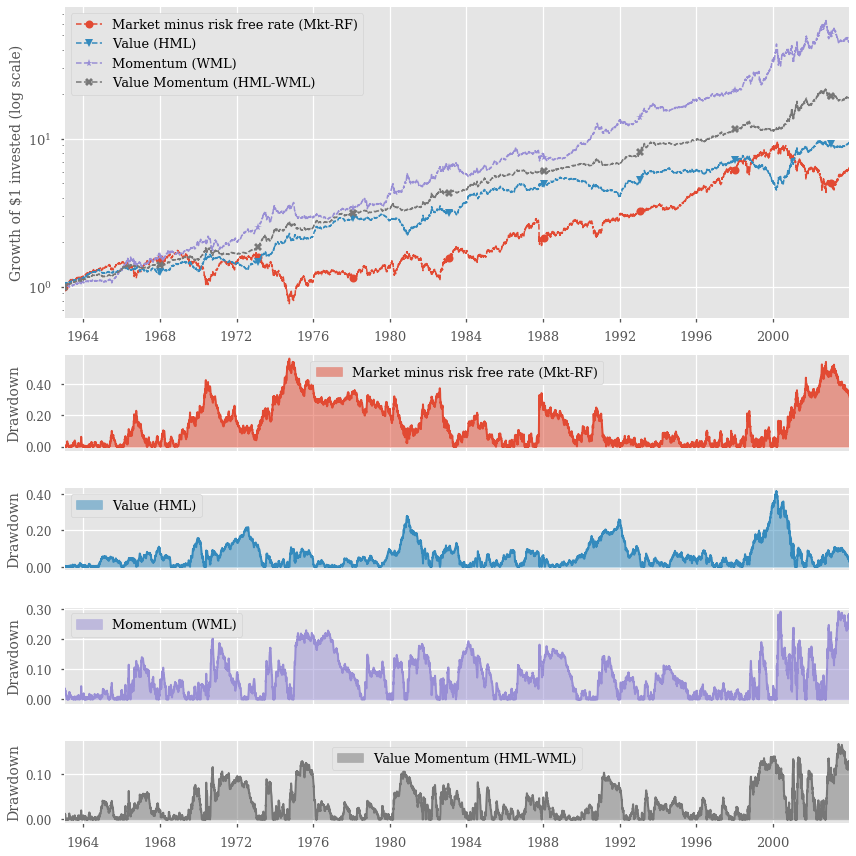

In [11]:
start, end = datetime.date(year=1963, month=1, day=1), datetime.date(year=2004,
                                                                     month=1,
                                                                     day=1)
df_before_15_63 = RETURNS.loc[start:end]
Return_DD(df=df_before_15_63, dic_labels=dic_fac, time_frequency=FREQUENCY)

In [12]:
perf_stat(df=df_before_15_63.iloc[:, :4], all_stats=True, dic_perf=PERF_STAT_DIC)

,Mkt-RF,HML,WML,HML-WML
N,10321.000,10321.000,10321.000,10321.000
Min,-17.440,-4.155,-7.270,-5.401
25 %,-0.410,-0.200,-0.190,-0.122
50 %,0.040,0.015,0.060,0.034
75 %,0.470,0.235,0.310,0.187
Max,8.570,3.775,5.105,2.767
Mean,0.022,0.023,0.039,0.029
SD,0.905,0.446,0.594,0.350
Skew,-0.759,0.085,-0.947,-0.739
Kurtosis,18.416,6.347,12.206,16.547


### Performance  before the last 15 years starting from 1927 (all data)

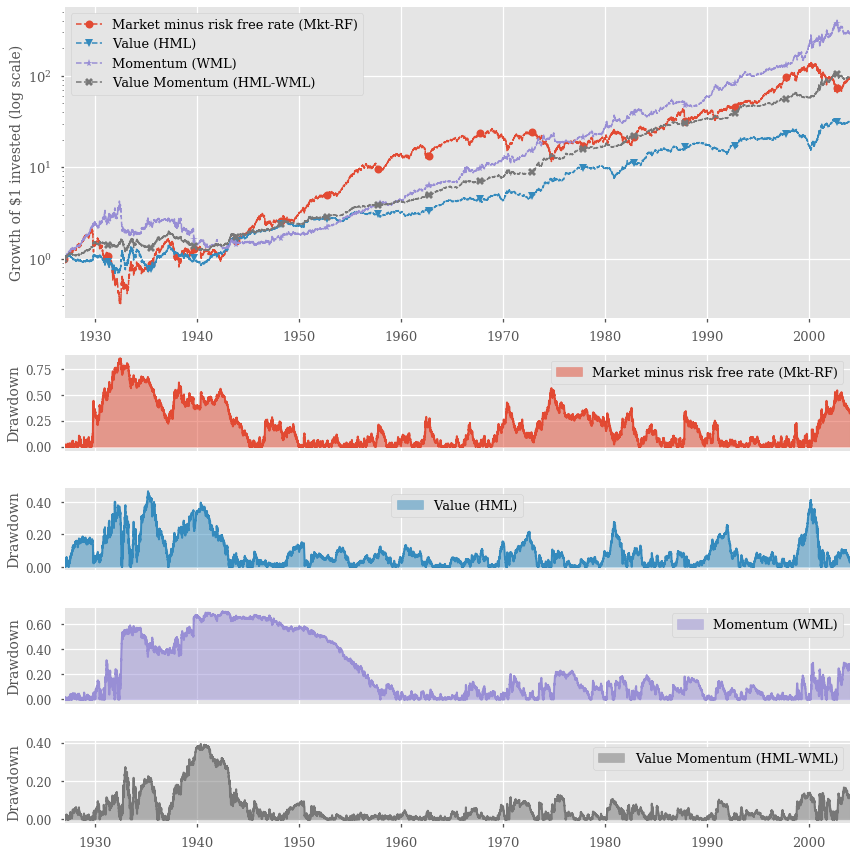

In [13]:
start, end = datetime.date(year=1927, month=1, day=1), datetime.date(year=2004,
                                                                     month=1,
                                                                     day=1)
df_before_15_27 = RETURNS.loc[start:end]
Return_DD(df=df_before_15_27, dic_labels=dic_fac, time_frequency=FREQUENCY)

In [14]:
perf_stat(df=df_before_15_27.iloc[:, :4], all_stats=True, dic_perf=PERF_STAT_DIC)

,Mkt-RF,HML,WML,HML-WML
N,20466.000,20466.000,20466.000,20466.000
Min,-17.440,-5.985,-18.335,-5.401
25 %,-0.400,-0.230,-0.225,-0.149
50 %,0.060,0.010,0.060,0.030
75 %,0.480,0.255,0.330,0.203
Max,15.760,8.425,5.735,6.009
Mean,0.028,0.019,0.030,0.023
SD,1.047,0.578,0.706,0.433
Skew,-0.103,0.768,-1.887,-0.110
Kurtosis,18.097,17.046,33.580,16.105


In [15]:
# perf stats to choose from
PERF_STAT_DIC.keys()

dict_keys(['N', 'Min', '25 %', '50 %', '75 %', 'Max', 'Mean', 'SD', 'Skew', 'Kurtosis', 'Terminal Wealth', 'Mean (yr)', 'SD (yr)', 'SR (yr)', 'SR', 'Kappa Ratio', 'MDD (%)', 'Calmar Ratio (yr)', 'Max TUW (Year)', 'Underwater (%)', '% MDD >20 %'])

In [16]:
sum_stats = [
    'Mean','Mean (yr)','SD','SD (yr)','SR', 'SR (yr)', 'Calmar Ratio (yr)', 'Kappa Ratio','MDD (%)'
]
investment_horizon = [len(df_15) / FREQUENCY]  # in years
# store all the output in a dictionary
store_output_dic_63, store_output_dic_27 = {}, {}

### Comparison performance
 - last 15 years (2004-2019)
 - 1963 - 2003
 - 1927 - 2003

In [17]:
stats_15 =  perf_stat(df=df_15.iloc[:, :4], all_stats=True,
              dic_perf=PERF_STAT_DIC).loc[sum_stats, :]
stats_15_63 = perf_stat(df=df_before_15_63.iloc[:, :4],
              all_stats=True, dic_perf=PERF_STAT_DIC).loc[sum_stats, :]
stats_15_27 = perf_stat(df=df_before_15_27.iloc[:, :4],
              all_stats=True, dic_perf=PERF_STAT_DIC).loc[sum_stats, :]

# append together
a = pd.concat([stats_15.T, stats_15_63.T, stats_15_27.T]).loc[:, sum_stats]
index = pd.MultiIndex.from_product([["2004-2019", "1963-2003", "1927-2003"],
                                    ["Mkt-Rf", "HML", 'WLM', 'HLM-WML']],
                                   names=["Period", "Portfolio"])

CI_df = pd.DataFrame(a.values, index=index, columns=a.columns)
CI_df
print(CI_df.loc[:,[f"Mean (yr)","SD (yr)","SR (yr)"]].to_latex())

\begin{tabular}{llrrr}
\toprule
          &         &  Mean (yr) &  SD (yr) &  SR (yr) \\
Period & Portfolio &            &          &          \\
\midrule
2004-2019 & Mkt-Rf &      9.215 &   18.339 &    0.502 \\
          & HML &     -0.262 &    9.918 &   -0.026 \\
          & WLM &      1.588 &   14.592 &    0.109 \\
          & HLM-WML &      0.478 &    5.718 &    0.084 \\
1963-2003 & Mkt-Rf &      5.582 &   14.372 &    0.388 \\
          & HML &      5.738 &    7.080 &    0.810 \\
          & WLM &      9.761 &    9.428 &    1.035 \\
          & HLM-WML &      7.347 &    5.560 &    1.321 \\
1927-2003 & Mkt-Rf &      7.014 &   16.622 &    0.422 \\
          & HML &      4.697 &    9.169 &    0.512 \\
          & WLM &      7.615 &   11.206 &    0.680 \\
          & HLM-WML &      5.864 &    6.876 &    0.853 \\
\bottomrule
\end{tabular}



<a id='2.1'></a>
## Simulation Period: 01-01-1963 till 31-12-2003 

<a id='2.1.1'></a>
###  Market 

In [18]:
#plt.style.use('tableau-colorblind10')
market_simulation_15_63 = Simulation(data=df_before_15_63.loc[:, ["Mkt-RF"]],
                                     n_paths=N_PATHS,
                                     blocksize=BLOCKSIZE,
                                     stats=sum_stats,
                                     perf_functions=PERF_STAT_DIC,
                                     investment_horizon=investment_horizon,
                                     frequency=FREQUENCY,
                                     plotting=PLOT_INTERMEDIATE,
                                     store_output=store_output_dic_63,
                                     store_sim=True,
                                     add_noise=False)

market_simulation_15_63.normal()
market_simulation_15_63.iid_bootstrap()
market_simulation_15_63.cbb_bootstrap()
market_simulation_15_63.sb_bootstrap()
# market_simulation_15_63.visualize(nr_paths=50,
#                                   last_15=df_15.loc[:, ["Mkt-RF"]],
#                                   size=(12, 10))

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



In [19]:
market_simulation_15_63.store_output.keys()

dict_keys(['Mkt-RF'])

<a id='2.1.2'></a>
### Value (HML) 

In [20]:
value_simulation_15_63 = Simulation(data=df_before_15_63.loc[:, ["HML"]],
                                    n_paths=N_PATHS,
                                    blocksize=BLOCKSIZE,
                                    stats=sum_stats,
                                    perf_functions=PERF_STAT_DIC,
                                    investment_horizon=investment_horizon,
                                    frequency=FREQUENCY,
                                    plotting=PLOT_INTERMEDIATE,
                                    store_output=store_output_dic_63,
                                    store_sim=True,
                                    add_noise=False)

value_simulation_15_63.normal()
value_simulation_15_63.iid_bootstrap()
value_simulation_15_63.cbb_bootstrap()
value_simulation_15_63.sb_bootstrap()
# value_simulation_15_63.visualize(nr_paths=50,
#                                  last_15=df_15.loc[:, ["HML"]],
#                                  size=(12, 10))

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



In [21]:
value_simulation_15_63.store_output.keys()

dict_keys(['Mkt-RF', 'HML'])

<a id='2.1.3'></a>
###  Momentum (WML) 

In [22]:
momentum_simulation_15_63 = Simulation(data=df_before_15_63.loc[:, ["WML"]],
                                       n_paths=N_PATHS,
                                       blocksize=BLOCKSIZE,
                                       stats=sum_stats,
                                       perf_functions=PERF_STAT_DIC,
                                       investment_horizon=investment_horizon,
                                       frequency=FREQUENCY,
                                       plotting=PLOT_INTERMEDIATE,
                                       store_output=store_output_dic_63,
                                       store_sim=True,
                                       add_noise=False)

momentum_simulation_15_63.normal()
momentum_simulation_15_63.iid_bootstrap()
momentum_simulation_15_63.cbb_bootstrap()
momentum_simulation_15_63.sb_bootstrap()
# momentum_simulation_15_63.visualize(nr_paths=50,
#                                     last_15=df_15.loc[:, ["WML"]],
#                                     size=(12, 10))

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



In [23]:
momentum_simulation_15_63.store_output.keys()

dict_keys(['Mkt-RF', 'HML', 'WML'])

<a id='2.1.3'></a>
### Value-Momentum (HML-WML) 

In [24]:
val_mom_simulation_15_63 = Simulation(data=df_before_15_63.loc[:, ["HML-WML"]],
                                      n_paths=N_PATHS,
                                      blocksize=BLOCKSIZE,
                                      stats=sum_stats,
                                      perf_functions=PERF_STAT_DIC,
                                      investment_horizon=investment_horizon,
                                      frequency=FREQUENCY,
                                      plotting=PLOT_INTERMEDIATE,
                                      store_output=store_output_dic_63,
                                      store_sim=True,
                                      add_noise=False)

val_mom_simulation_15_63.normal()
val_mom_simulation_15_63.iid_bootstrap()
val_mom_simulation_15_63.cbb_bootstrap()
val_mom_simulation_15_63.sb_bootstrap()
# val_mom_simulation_15_63.visualize(nr_paths=50,
#                                    last_15=df_15.loc[:, ["HML-WML"]],
#                                    size=(12, 10))

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



In [25]:
val_mom_simulation_15_63.store_output.keys()

dict_keys(['Mkt-RF', 'HML', 'WML', 'HML-WML'])

<a id='2.2'></a>
## Simulation Period: 01-01-1927 till 31-12-2003 

<a id='2.2.1'></a>
### Market (Mkt-RF) 

In [26]:
market_simulation_15_27 = Simulation(data=df_before_15_27.loc[:, ["Mkt-RF"]],
                                     n_paths=N_PATHS,
                                     blocksize=BLOCKSIZE,
                                     stats=sum_stats,
                                     perf_functions=PERF_STAT_DIC,
                                     investment_horizon=investment_horizon,
                                     frequency=FREQUENCY,
                                     plotting=PLOT_INTERMEDIATE,
                                     store_output=store_output_dic_27,
                                     store_sim=True,
                                     add_noise=False)

market_simulation_15_27.normal()
market_simulation_15_27.iid_bootstrap()
market_simulation_15_27.cbb_bootstrap()
market_simulation_15_27.sb_bootstrap()
# market_simulation_15_27.visualize(nr_paths=50,
#                                   last_15=df_15.loc[:, ["Mkt-RF"]],
#                                   size=(12, 10))

#plt.savefig('Simulated_paths_27_mkt', bbox_inches='tight')  # save plot

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



In [27]:
market_simulation_15_27.store_output.keys()

dict_keys(['Mkt-RF'])

<a id='2.2.2'></a>
###  Value (HML) 

In [28]:
value_simulation_15_27 = Simulation(data=df_before_15_27.loc[:, ["HML"]],
                                    n_paths=N_PATHS,
                                    blocksize=BLOCKSIZE,
                                    stats=sum_stats,
                                    perf_functions=PERF_STAT_DIC,
                                    investment_horizon=investment_horizon,
                                    frequency=FREQUENCY,
                                    plotting=PLOT_INTERMEDIATE,
                                    store_output=store_output_dic_27,
                                    store_sim=True,
                                    add_noise=False)

value_simulation_15_27.normal()
value_simulation_15_27.iid_bootstrap()
value_simulation_15_27.cbb_bootstrap()
value_simulation_15_27.sb_bootstrap()
# value_simulation_15_27.visualize(nr_paths=50,
#                                  last_15=df_15.loc[:, ["HML"]],
#                                  size=(12, 10))

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



In [29]:
value_simulation_15_27.store_output.keys()

dict_keys(['Mkt-RF', 'HML'])

<a id='2.2.3'></a>
### Momentum (WML) 

In [30]:
momentum_simulation_15_27 = Simulation(data=df_before_15_27.loc[:, ["WML"]],
                                       n_paths=N_PATHS,
                                       blocksize=BLOCKSIZE,
                                       stats=sum_stats,
                                       perf_functions=PERF_STAT_DIC,
                                       investment_horizon=investment_horizon,
                                       frequency=FREQUENCY,
                                       plotting=PLOT_INTERMEDIATE,
                                       store_output=store_output_dic_27,
                                       store_sim=True,
                                       add_noise=False)

momentum_simulation_15_27.normal()
momentum_simulation_15_27.iid_bootstrap()
momentum_simulation_15_27.cbb_bootstrap()
momentum_simulation_15_27.sb_bootstrap()
# momentum_simulation_15_27.visualize(nr_paths=50,
#                                     last_15=df_15.loc[:, ["WML"]],
#                                     size=(12, 10))

#plt.savefig('Simulated_paths_27_wml', bbox_inches='tight')  # save plot

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



In [31]:
momentum_simulation_15_27.store_output.keys()

dict_keys(['Mkt-RF', 'HML', 'WML'])

<a id='2.2.4'></a>
### Value-Momentum (HML-WML) 

In [32]:
val_mom_simulation_15_27 = Simulation(data=df_before_15_27.loc[:, ["HML-WML"]],
                                      n_paths=N_PATHS,
                                      blocksize=BLOCKSIZE,
                                      stats=sum_stats,
                                      perf_functions=PERF_STAT_DIC,
                                      investment_horizon=investment_horizon,
                                      frequency=FREQUENCY,
                                      plotting=PLOT_INTERMEDIATE,
                                      store_output=store_output_dic_27,
                                      store_sim=True,
                                      add_noise=False)

val_mom_simulation_15_27.normal()
val_mom_simulation_15_27.iid_bootstrap()
val_mom_simulation_15_27.cbb_bootstrap()
val_mom_simulation_15_27.sb_bootstrap()
# val_mom_simulation_15_27.visualize(nr_paths=50,
#                                    last_15=df_15.loc[:, ["HML-WML"]],
#                                    size=(12, 10))

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



In [33]:
val_mom_simulation_15_27.store_output.keys()

dict_keys(['Mkt-RF', 'HML', 'WML', 'HML-WML'])

 <a id='2.3'></a>
## Summarize results

<a id='2.3.1'></a>
### Simulation Period: 01-01-1963 till 31-12-2003 

In [34]:
sum_stats

['Mean',
 'Mean (yr)',
 'SD',
 'SD (yr)',
 'SR',
 'SR (yr)',
 'Calmar Ratio (yr)',
 'Kappa Ratio',
 'MDD (%)']

In [35]:
# choose 2 stats to look at from the list above
stats1 = 'SR'
stats2 = 'Calmar Ratio (yr)'

####  SR

In [36]:
# observed performance over the last 15 years
perf_stat(df=df_15.iloc[:, :4],
          stats=[stats1],
          dic_perf=PERF_STAT_DIC)

,Mkt-RF,HML,WML,HML-WML
SR,0.032,-0.002,0.007,0.005


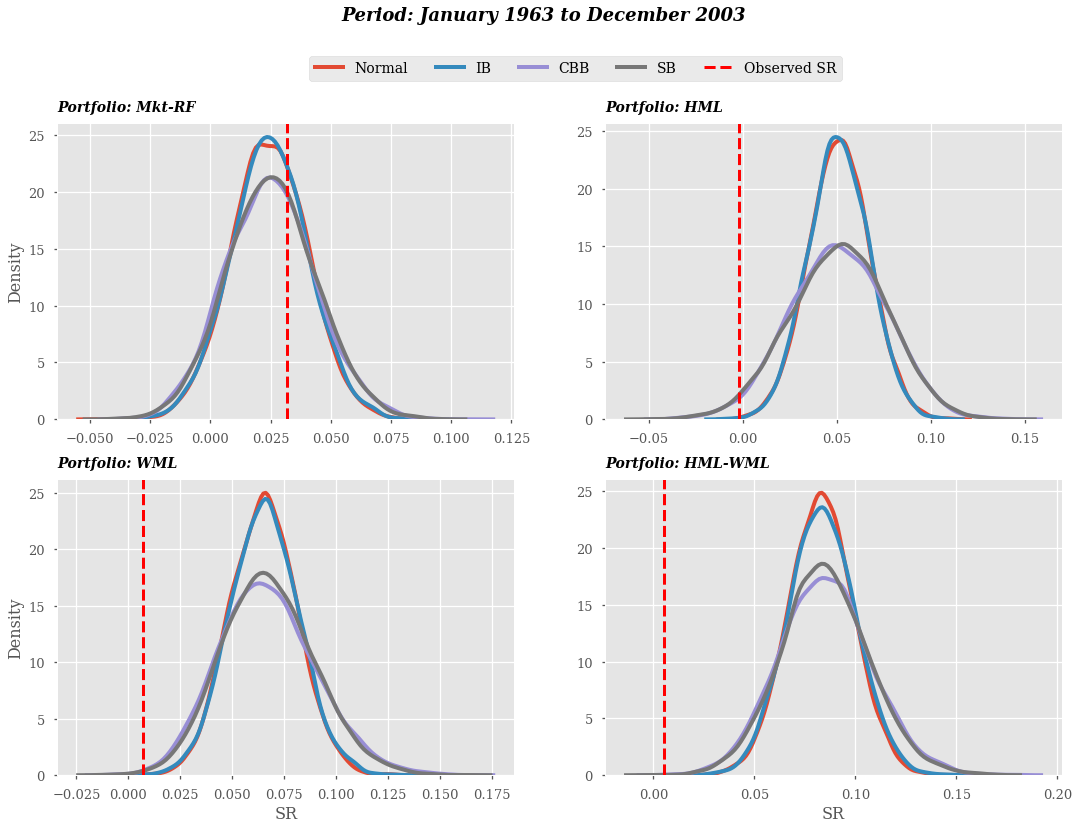

In [37]:
obs_T = perf_stat(df=df_15, stats=[stats1],
                  dic_perf=PERF_STAT_DIC).values.tolist()[0]
permutation_plot(dic=val_mom_simulation_15_63.store_output,
                 investment_h=investment_horizon[0],
                 statistic=stats1,
                 period="1963-2003",
                 obs_stats=obs_T,
                 statistic_name="Observed SR",
                 color_title="black",
                 add_legend=True,
                 title="Period: January 1963 to December 2003",
                 y_title=1.015)



plt.savefig('SR_Density_63.pdf', format="pdf", bbox_inches='tight')

####  Calmar ratio

In [38]:
# observed maximum dd over the last 15 years
perf_stat(df=df_15.iloc[:, :4],
          stats=[stats2],
          dic_perf=PERF_STAT_DIC)

,Mkt-RF,HML,WML,HML-WML
Calmar Ratio (yr),0.165,-0.008,0.025,0.015


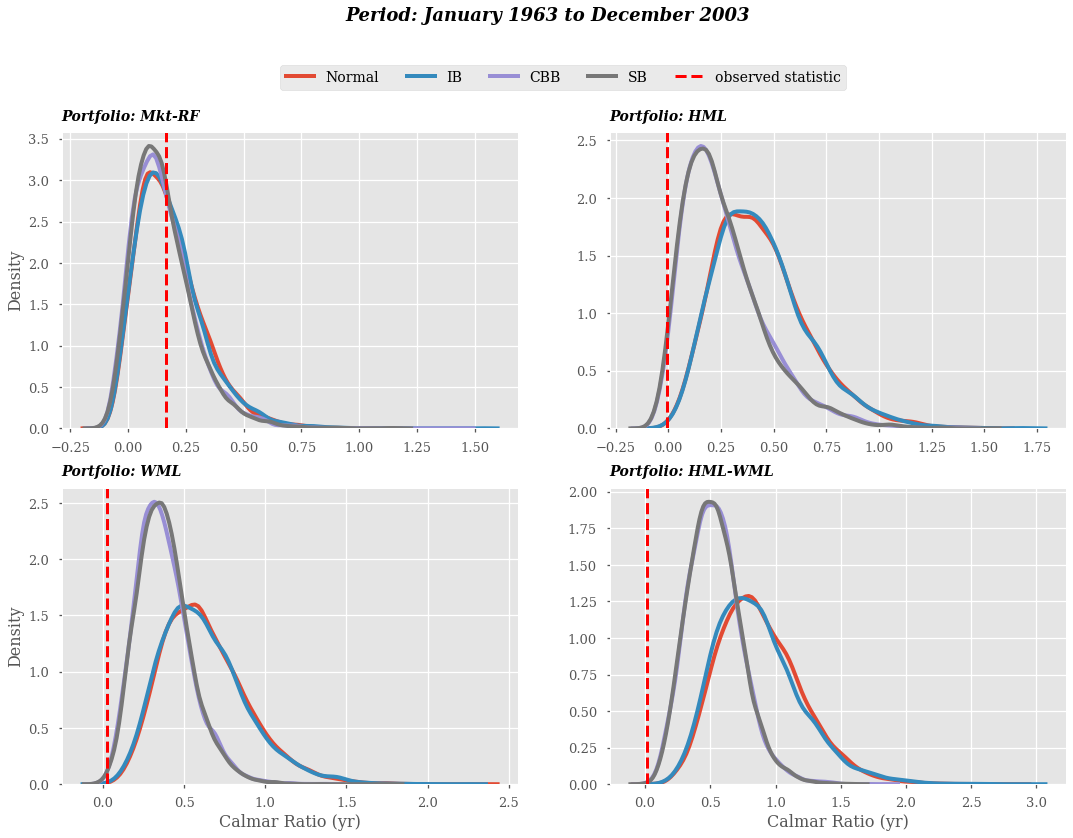

In [39]:
obs_T = perf_stat(df=df_15, stats=[stats2],
                  dic_perf=PERF_STAT_DIC).values.tolist()[0]
permutation_plot(dic=val_mom_simulation_15_63.store_output,
                 investment_h=investment_horizon[0],
                 statistic=stats2,
                 period="1963-2003",
                 color_title="black",
                 add_legend=True,
                 title="Period: January 1963 to December 2003",
                 obs_stats=obs_T)
#plt.savefig('Max_TUW_Density_63', bbox_inches='tight')

#### Numeric Summary Table: 01-01-1963 till 31-12-2003

The table below shows the number of returns paths with a more extreme statistic (more to the left except for drawdown this is right). The number of simulations was set at 10,000. 

In [40]:
out_63 = p_table(stat=sum_stats,
                 dic=val_mom_simulation_15_63.store_output,
                 observed=df_15,
                 perf_stats_dic=PERF_STAT_DIC) / N_PATHS * 100
out_63

Performance statistic*       Mean Mean (yr)      SD SD (yr)     SR SR (yr)  \
Portfolio Simulatin Method                                                   
Mkt-RF    Normal           83.950    83.950 100.000 100.000 67.010  67.010   
          IB               84.420    84.420 100.000 100.000 66.920  66.920   
          CBB              81.930    81.930  99.750  99.750 64.410  64.410   
          SB               81.670    81.670  99.530  99.530 63.720  63.720   
HML       Normal            0.020     0.020 100.000 100.000  0.030   0.030   
          IB                0.080     0.080 100.000 100.000  0.090   0.090   
          CBB               2.110     2.110  99.960  99.960  2.180   2.180   
          SB                2.180     2.180  99.720  99.720  2.270   2.270   
WML       Normal            0.020     0.020 100.000 100.000  0.010   0.010   
          IB                0.060     0.060 100.000 100.000  0.030   0.030   
          CBB               0.320     0.320 100.000 100.000  0.170   0.170   
          SB                0.420     0.420  99.930  99.930  0.230   0.230   
HML-WML   Normal            0.000     0.000  99.450  99.450  0.000   0.000   
          IB                0.000     0.000  81.890  81.890  0.000   0.000   
          CBB               0.020     0.020  63.670  63.670  0.010   0.010   
          SB                0.020     0.020  64.200  64.200  0.020   0.020   

Performance statistic*     Calmar Ratio (yr) Kappa Ratio MDD (%)  
Portfolio Simulatin Method                                        
Mkt-RF    Normal                      52.030      51.600  94.660  
          IB                          52.020      66.170  94.350  
          CBB                         59.470      63.200  84.500  
          SB                          60.380      62.880  83.640  
HML       Normal                       0.020       0.030  99.900  
          IB                           0.090       0.090  99.880  
          CBB                          2.040       2.200  82.610  
          SB                           2.050       2.290  79.290  
WML       Normal                       0.010       0.010 100.000  
          IB                           0.020       0.030 100.000  
          CBB                          0.180       0.170 100.000  
          SB                           0.240       0.220  99.990  
HML-WML   Normal                       0.000       0.000 100.000  
          IB                           0.000       0.000 100.000  
          CBB                          0.010       0.010  99.980  
          SB                           0.020       0.020  99.940

**Observations regarding the Arithmetic Return**

Below I describe my observations for the **annualized Arithmetic return**, similar conclusions hold for other performance statistics (except maybe for maximum drawdown)

The permuted distributions excludes the 15-year period ending 28 February 2019 from the analysis in creating
the 10,000 simulated histories of factor returns. If an investor uses these data to calibrate
expectations about performance over the next 15 years, **how probable would the actual
observed Arithmetic annual returns seem?**

As in chapter 3, I use a blocksize of 126 for the circular block bootstrap and the average blocksize for the stationary bootstrap is also set at 126 days. The p-value associated with the observed  returns are very low except for the market portfolio. Relative to the powerful returns from before 2004, the recent performance of the value, momentum and the value-momentum strategies over the past 15 years is unexpectedly low. There certainly are differences between the different simulation methods, though the main conclusion does not change.

<a id='2.3.2'></a>
### Simulation Period: 01-01-1927 till 31-12-2003 

####  SR

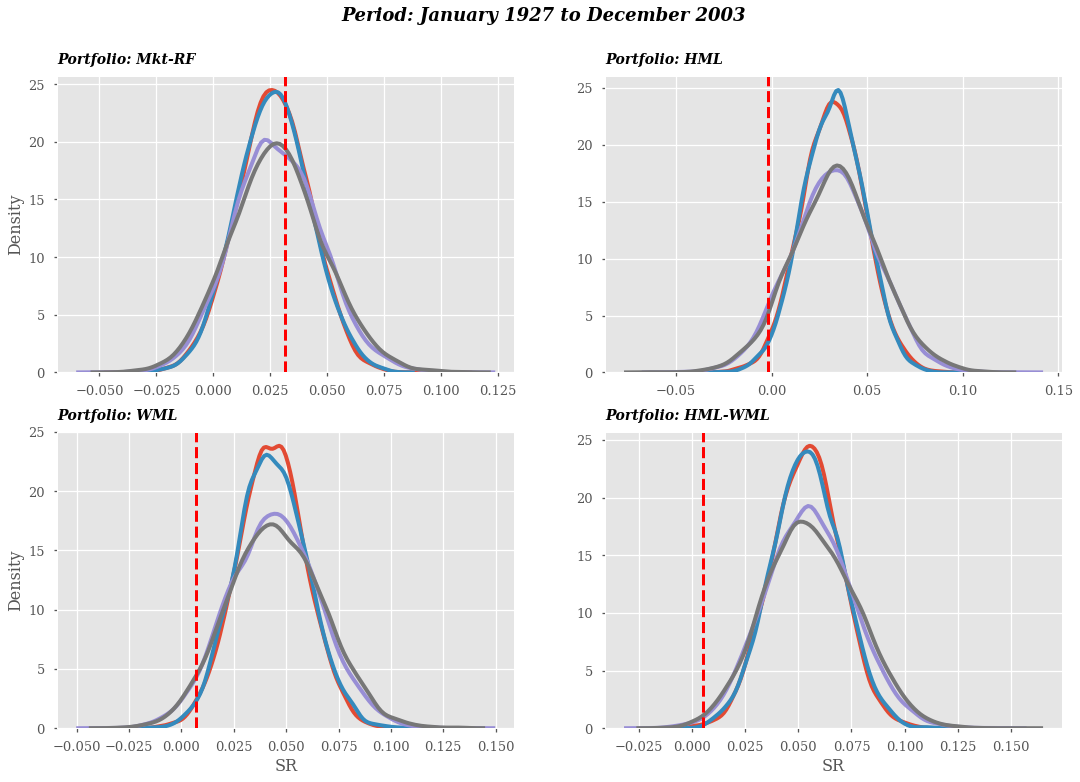

In [41]:
obs_T = perf_stat(df=df_15, stats=[stats1],
                  dic_perf=PERF_STAT_DIC).values.tolist()[0]
permutation_plot(dic=val_mom_simulation_15_27.store_output,
                 investment_h=investment_horizon[0],
                 statistic=stats1,
                 period="1927-2003",
                 obs_stats=obs_T,
                 statistic_name="Observed SR",
                 color_title="black",
                 add_legend=False,
                 title="Period: January 1927 to December 2003",
                 y_title=.96)
plt.savefig('SR_Density_27.pdf', format="pdf", bbox_inches='tight')

####  Calmar Ratio

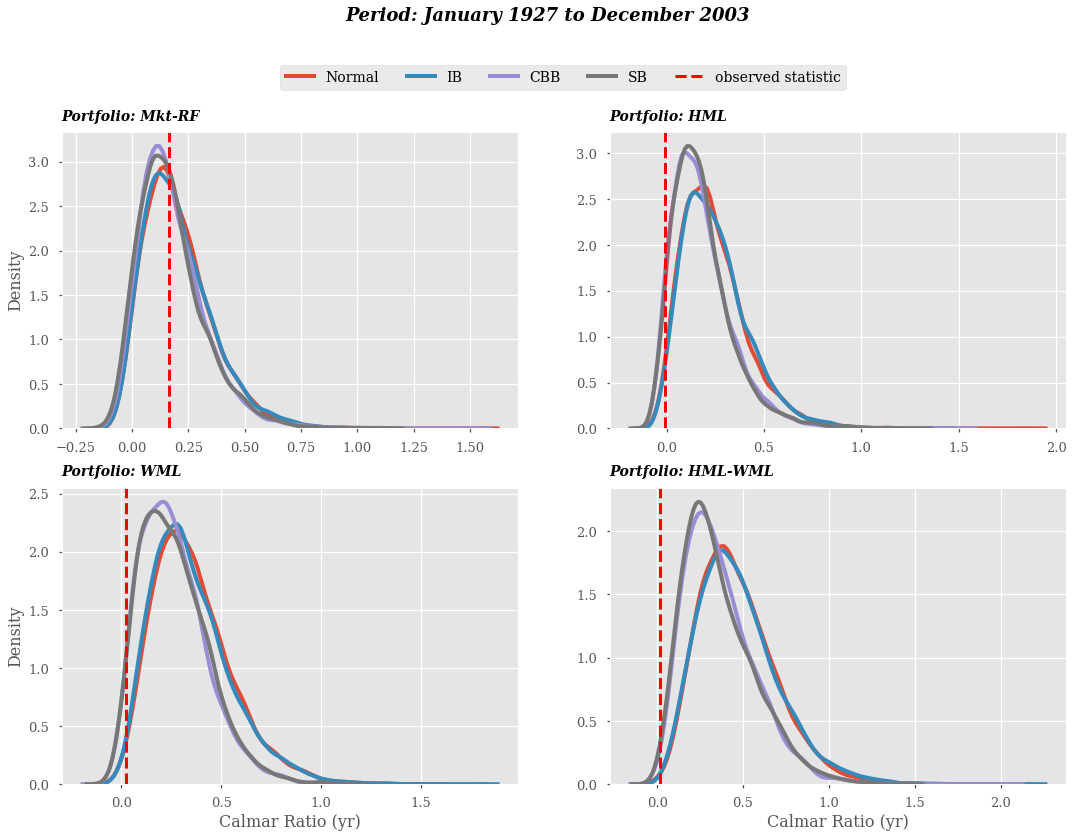

In [42]:
obs_T = perf_stat(df=df_15, stats=[stats2],
                  dic_perf=PERF_STAT_DIC).values.tolist()[0]
permutation_plot(dic=val_mom_simulation_15_27.store_output,
                 investment_h=investment_horizon[0],
                 statistic=stats2,
                 period="1927-2003",
                 color_title="black",
                 add_legend=True,
                 title="Period: January 1927 to December 2003",
                 obs_stats=obs_T)

#### Numeric Summary Table: 01-01-1927 till 31-12-2003

The table below shows the number of returns paths with a more extreme statistic (more to to left except for drawdown this is right). The number of simulations was set at 10,000. 

In [43]:
out_27 = p_table(stat=sum_stats,
                 dic=val_mom_simulation_15_27.store_output,
                 observed=df_15,
                 perf_stats_dic=PERF_STAT_DIC) / N_PATHS * 100

out_27
#print(out_27.loc[:,['Arithmetic SR','Max time in DD (Year)']].to_latex())

Performance statistic*       Mean Mean (yr)      SD SD (yr)     SR SR (yr)  \
Portfolio Simulatin Method                                                   
Mkt-RF    Normal           70.010    70.010 100.000 100.000 62.480  62.480   
          IB               70.440    70.440  99.430  99.430 62.900  62.900   
          CBB              66.710    66.710  81.640  81.640 58.070  58.070   
          SB               67.280    67.280  77.430  77.430 57.810  57.810   
HML       Normal            1.860     1.860 100.000 100.000  1.910   1.910   
          IB                1.720     1.720  98.760  98.760  1.790   1.790   
          CBB               6.080     6.080  74.470  74.470  6.140   6.140   
          SB                5.760     5.760  73.190  73.190  5.810   5.810   
WML       Normal            1.830     1.830 100.000 100.000  1.320   1.320   
          IB                1.770     1.770  99.990  99.990  1.370   1.370   
          CBB               4.720     4.720  99.020  99.020  4.200   4.200   
          SB                4.590     4.590  97.110  97.110  4.130   4.130   
HML-WML   Normal            0.180     0.180   0.000   0.000  0.210   0.210   
          IB                0.040     0.040   0.000   0.000  0.040   0.040   
          CBB               0.600     0.600  14.570  14.570  0.670   0.670   
          SB                0.580     0.580  19.730  19.730  0.650   0.650   

Performance statistic*     Calmar Ratio (yr) Kappa Ratio MDD (%)  
Portfolio Simulatin Method                                        
Mkt-RF    Normal                      46.370      47.020  90.040  
          IB                          46.320      63.800  90.250  
          CBB                         53.820      58.480  73.480  
          SB                          54.410      59.180  69.040  
HML       Normal                       1.850       1.980  92.800  
          IB                           1.710       1.750  93.310  
          CBB                          5.770       6.080  60.720  
          SB                           5.520       5.800  57.310  
WML       Normal                       1.010       0.950 100.000  
          IB                           1.040       1.740 100.000  
          CBB                          4.110       4.720  97.820  
          SB                           4.090       4.750  97.770  
HML-WML   Normal                       0.170       0.180  99.840  
          IB                           0.040       0.060  99.840  
          CBB                          0.570       0.690  96.080  
          SB                           0.540       0.710  95.800

### Comparison 1963-2003 vs 1927-2003

In [44]:
stats = [i[0] for i in out_27.columns]
micol = pd.MultiIndex.from_product(
    [['Period 1963-2003', 'Period 1927-2003'], stats],
    names=['', 'Performance Statsitic'])
x = pd.concat([out_63.T, out_27.T]).T
x = pd.DataFrame(x.values, columns=micol, index=x.index)
x

Period 1963-2003                                   \
Performance Statsitic                  Mean Mean (yr)      SD SD (yr)     SR   
Portfolio Simulatin Method                                                     
Mkt-RF    Normal                     83.950    83.950 100.000 100.000 67.010   
          IB                         84.420    84.420 100.000 100.000 66.920   
          CBB                        81.930    81.930  99.750  99.750 64.410   
          SB                         81.670    81.670  99.530  99.530 63.720   
HML       Normal                      0.020     0.020 100.000 100.000  0.030   
          IB                          0.080     0.080 100.000 100.000  0.090   
          CBB                         2.110     2.110  99.960  99.960  2.180   
          SB                          2.180     2.180  99.720  99.720  2.270   
WML       Normal                      0.020     0.020 100.000 100.000  0.010   
          IB                          0.060     0.060 100.000 100.000  0.030   
          CBB                         0.320     0.320 100.000 100.000  0.170   
          SB                          0.420     0.420  99.930  99.930  0.230   
HML-WML   Normal                      0.000     0.000  99.450  99.450  0.000   
          IB                          0.000     0.000  81.890  81.890  0.000   
          CBB                         0.020     0.020  63.670  63.670  0.010   
          SB                          0.020     0.020  64.200  64.200  0.020   

                                                                          \
Performance Statsitic      SR (yr) Calmar Ratio (yr) Kappa Ratio MDD (%)   
Portfolio Simulatin Method                                                 
Mkt-RF    Normal            67.010            52.030      51.600  94.660   
          IB                66.920            52.020      66.170  94.350   
          CBB               64.410            59.470      63.200  84.500   
          SB                63.720            60.380      62.880  83.640   
HML       Normal             0.030             0.020       0.030  99.900   
          IB                 0.090             0.090       0.090  99.880   
          CBB                2.180             2.040       2.200  82.610   
          SB                 2.270             2.050       2.290  79.290   
WML       Normal             0.010             0.010       0.010 100.000   
          IB                 0.030             0.020       0.030 100.000   
          CBB                0.170             0.180       0.170 100.000   
          SB                 0.230             0.240       0.220  99.990   
HML-WML   Normal             0.000             0.000       0.000 100.000   
          IB                 0.000             0.000       0.000 100.000   
          CBB                0.010             0.010       0.010  99.980   
          SB                 0.020             0.020       0.020  99.940   

                           Period 1927-2003                                   \
Performance Statsitic                  Mean Mean (yr)      SD SD (yr)     SR   
Portfolio Simulatin Method                                                     
Mkt-RF    Normal                     70.010    70.010 100.000 100.000 62.480   
          IB                         70.440    70.440  99.430  99.430 62.900   
          CBB                        66.710    66.710  81.640  81.640 58.070   
          SB                         67.280    67.280  77.430  77.430 57.810   
HML       Normal                      1.860     1.860 100.000 100.000  1.910   
          IB                          1.720     1.720  98.760  98.760  1.790   
          CBB                         6.080     6.080  74.470  74.470  6.140   
          SB                          5.760     5.760  73.190  73.190  5.810   
WML       Normal                      1.830     1.830 100.000 100.000  1.320   
          IB                          1.770     1.770  99.990  99.990  1.370   
          CBB        

#### Latex code

In [45]:
perf_stats = ["SR"]
micol = pd.MultiIndex.from_product(
    [['Period: 1963-2003', 'Period: 1927-2003'], perf_stats],
    names=['', 'Performance Statsitic'])
x = pd.concat([out_63.loc[:, perf_stats].T, out_27.loc[:, perf_stats].T]).T
x = pd.DataFrame(x.values, columns=micol, index=x.index)
print(x.to_latex())

\begin{tabular}{llrr}
\toprule
        & {} & Period: 1963-2003 & Period: 1927-2003 \\
        & Performance Statsitic &                SR &                SR \\
Portfolio & Simulatin Method &                   &                   \\
\midrule
Mkt-RF & Normal &            67.010 &            62.480 \\
        & IB &            66.920 &            62.900 \\
        & CBB &            64.410 &            58.070 \\
        & SB &            63.720 &            57.810 \\
HML & Normal &             0.030 &             1.910 \\
        & IB &             0.090 &             1.790 \\
        & CBB &             2.180 &             6.140 \\
        & SB &             2.270 &             5.810 \\
WML & Normal &             0.010 &             1.320 \\
        & IB &             0.030 &             1.370 \\
        & CBB &             0.170 &             4.200 \\
        & SB &             0.230 &             4.130 \\
HML-WML & Normal &             0.000 &             0.210 \\
        & IB &     

<a id='Chapter3'></a>
# Chapter 3: Conclusion and discussion
 
**Recent past performance of value, momentum and a 60-40 value-momentum strategies are unexpectedly low**

It is no secret that value and momentum strategies have recently fallen far short of investor expectations. Is this a case of the factors being broken or have they just been unlucky over the last 15 years? The answer is probably a combination of both. Recent factor performance has been uncharacteristically bad given pre-2004 performance. Value (HML), momentum (WML) and 50-50 value-momentum (HML-WML) pre-2004 returns were likely inflated due to data mining and selection bias, and their post 2004 returns were likely depressed by crowding  as the factors gained widespread adoption. In contrary, the performance of the market portfolio (Mkt-RF) over the last 15 years is in line with historical expectations.

<a id='Chapter4'></a>
# Chapter 4: Limitations

**Assumptions being made**

- stationarity (check) and ergodicity
- all data over the whole sample is representative: contrary to other people I do think that data from 1927 is still useful. I believe  events like the crash in 1930 can happen again (actually the magnitude of 2007 was close to 1930).
  
- the sampled blocks are iid
  
- there are clear volatility regimes: these have clear impact on our bootstrap results. What are the implications?
  
- survivorship bias: the US stock market was one of the best investment choices an investor could have made. Therefore results in Chapter 3 are probably underestimated (in the negative sense) and are not generalizable to other countries. Furthermore, even in the US, very few investment firms outperform (on various statistics) the portfolios considered in this study (even before slippage and transactions costs).

- I assume an investor reinvest his money (no withdrawals), this might not be realistic in reality

- other important assumptions?

<a id='Chapter5'></a>
# Chapter 5: References

## Papers
- **[Arnott, R. D., Harvey, C. R., Kalesnik, V., & Linnainmaa, J. T. (2019). Alice’s Adventures in Factorland: Three Blunders  That Plague Factor Investing. Available at SSRN 3331680.](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3331680)**
- **[Fama, E. F., & French, K. R. (2018). Long-horizon returns. The Review of Asset Pricing Studies, 8(2), 232-252.](https://academic.oup.com/raps/article-abstract/8/2/232/4810768)**
- **[Fama, E. F., & French, K. R. (2012). Size, value, and momentum in international stock returns. Journal of financial economics, 105(3), 457-472.](https://www.sciencedirect.com/science/article/pii/S0304405X12000931)**
- **[Daniel, K., & Moskowitz, T. J. (2016). Momentum crashes. Journal of Financial Economics, 122(2), 221-247.](https://www.sciencedirect.com/science/article/pii/S0304405X16301490)**
- **[Radovanov, B., & Marcikić, A. (2014). A comparison of four different block bootstrap methods. Croatian Operational Research Review, 5(2), 189-202.](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=Radovanov%2C+B.%2C+%26+Marciki%C4%87%2C+A.+%282014%29.+A+comparison+of+four+different+block+bootstrap+methods.+Croatian+Operational+Research+Review%2C+5%282%29%2C+189-202&btnG=)**

- **[Singh, K., & Xie, M. (2008). Bootstrap: a statistical method. Unpublished manuscript, Rutgers University, USA. Retrieved from http://www. stat. rutgers. edu/home/mxie/RCPapers/bootstrap. pdf.](http://www.stat.rutgers.edu/home/mxie/stat586/handout/Bootstrap1.pdf)**
- **[Efron, B. (1992). Bootstrap methods: another look at the jackknife. In Breakthroughs in statistics (pp. 569-593). Springer, New York, NY.](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=Efron%2C+B.+%281979%29.+Bootstrap+methods%3A+Another+look+at+jackknife.+Ann.+Stat.+7%2C+1-26&btnG=)**

- **[Carlstein, E. (1986). The use of subseries values for estimating the variance of a general statistic from a stationary sequence. The annals of statistics, 14(3), 1171-1179.](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=Carlstein+%281986%29&btnG=)**

- **[Bailey, D. H., & Lopez de Prado, M. (2014). The deflated Sharpe ratio: Correcting for selection bias, backtest overfitting and non-normality. Journal of Portfolio Management, 40(5), 94-107.](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=deflated+sharpe+ratio&btnG=)**

- **[Opdyke, J. D. J. (2007). Comparing Sharpe ratios: so where are the p-values?. Journal of Asset Management, 8(5), 308-336.](https://link.springer.com/article/10.1057/palgrave.jam.2250084)**

## Blogs, websites, presentations ...

- **http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html**
- **http://keplerianfinance.com/2013/06/the-relevance-of-history/**
- **https://www.youtube.com/watch?v=27x632vOjXk&t=3349s**
- **https://www.youtube.com/watch?v=BtiqH_7d2es&t=28s**
- **http://www.blackarbs.com/blog/synthetic-data-generation-part-1-block-bootstrapping**
- **https://arch.readthedocs.io/en/latest/bootstrap/timeseries-bootstraps.html**
- **https://pandas-datareader.readthedocs.io/en/latest/remote_data.html**
- **http://www.ievbras.ru/ecostat/Kiril/R/Biblio_N/R_Eng/Chernick2011.pdf?fbclid=IwAR1f8UAc6s7FAGykclIB0usn0U9RGibNf6sB5ug2z9DEx9DoCK7Q-8nMVLk**
- **http://www.quantdevel.com/public/CSP2015/Talk/BootstrappingTimeSeriesData.pdf?fbclid=IwAR3FiKvHjfrg9zGZkm8aa07vMT15PkpxAYFLqvR50uBdGIjOgM0AY0nsd2U**
- **https://www.youtube.com/watch?v=-M1UtvoajUY**
- **https://www.winton.com/research/value-size-and-momentum-a-likely-example-of-selection-bias**